<a href="https://colab.research.google.com/github/AkothCarole/KNN-and-Naives-Bayes/blob/master/Week_9_IP_Caroline_Akoth_Naives_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

spam.csv is a dataset with variables that help determine if the an email is spam or not. 

**Background**

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.


**Creators:**

Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304

**Donor:**

George Forman (gforman at nospam hpl.hp.com) 650-857-7835

***b) Defining the Metric for Success***

To successfully use Naive bayes to recognise spam email based on the variables provided. 

**c) Understanding the context**

The question requires us to use Naives Bayes to classfify which emails as spam or not spam. 

**Naive Bayes** - Is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature

**d) Recording the Experimental Design**



**e) Data Relevance**

The dataset provided is relevant as it contain most required variables.

## 2. Reading the Data

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Loading the Data from the source i.e. csv
spam=pd.read_csv('spam.csv')
spam.head()

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1




## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
spam.head()

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# Previewing the bottom of our dataset
spam.tail()

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [5]:
# Checking whether each column has an appropriate datatype
spam.dtypes

wor1d_freq_make:               float64
word_freq_address:             float64
word_freq_all:                 float64
word_freq_3d:                  float64
word_freq_our:                 float64
word_freq_over:                float64
word_freq_remove:              float64
word_freq_internet:            float64
word_freq_order:               float64
word_freq_mail:                float64
word_freq_mail:.1              float64
word_freq_receive:             float64
word_freq_will:                float64
word_freq_people:              float64
word_freq_report:              float64
word_freq_addresses:           float64
word_freq_free:                float64
word_freq_business:            float64
word_freq_email:               float64
word_freq_you:                 float64
word_freq_credit:              float64
word_freq_your:                float64
word_freq_font:                float64
word_freq_000:                 float64
word_freq_money:               float64
word_freq_hp:            

In [6]:
#Check and define columns
spam.columns

Index(['wor1d_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_mail:.1', 'word_freq_receive:',
       'word_freq_will:', 'word_freq_people:', 'word_freq_report:',
       'word_freq_addresses:', 'word_freq_free:', 'word_freq_business:',
       'word_freq_email:', 'word_freq_you:', 'word_freq_credit:',
       'word_freq_your:', 'word_freq_font:', 'word_freq_000:',
       'word_freq_money:', 'word_freq_hp:', 'word_freq_hpl:',
       'word_freq_george:', 'word_freq_650:', 'word_freq_lab:',
       'word_freq_labs:', 'word_freq_telnet:', 'word_freq_857:',
       'word_freq_data:', 'word_freq_415:', 'word_freq_85:',
       'word_freq_technology:', 'word_freq_1999:', 'word_freq_parts:',
       'word_freq_pm:', 'word_freq_direct:', 'word_freq_cs:',
       'word_freq_meeting:', 'word_freq_original:', 'word_freq_project:',
   

In [7]:
spam.shape

(4601, 58)

In [8]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   wor1d_freq_make:             4601 non-null   float64
 1   word_freq_address:           4601 non-null   float64
 2   word_freq_all:               4601 non-null   float64
 3   word_freq_3d:                4601 non-null   float64
 4   word_freq_our:               4601 non-null   float64
 5   word_freq_over:              4601 non-null   float64
 6   word_freq_remove:            4601 non-null   float64
 7   word_freq_internet:          4601 non-null   float64
 8   word_freq_order:             4601 non-null   float64
 9   word_freq_mail:              4601 non-null   float64
 10  word_freq_mail:.1            4601 non-null   float64
 11  word_freq_receive:           4601 non-null   float64
 12  word_freq_will:              4601 non-null   float64
 13  word_freq_people: 

In [9]:
#Describe statistics

spam.describe()

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [10]:
#Checking for Outliers

def detect_outlier(spam):
    outliers=[]
    threshold=3
    mean_1 = np.mean(spam)
    std_1 =np.std(spam)
    
    for y in spam:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [11]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
for col in spam:
    rows, columns = spam.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(spam[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

wor1d_freq_make: has 90 outliers in total, which is 2.0% of data
word_freq_address: has 43 outliers in total, which is 0.93% of data
word_freq_all: has 94 outliers in total, which is 2.0% of data
word_freq_3d: has 13 outliers in total, which is 0.28% of data
word_freq_our: has 81 outliers in total, which is 1.8% of data
word_freq_over: has 104 outliers in total, which is 2.3% of data
word_freq_remove: has 99 outliers in total, which is 2.2% of data
word_freq_internet: has 77 outliers in total, which is 1.7% of data
word_freq_order: has 113 outliers in total, which is 2.5% of data
word_freq_mail: has 74 outliers in total, which is 1.6% of data
word_freq_mail:.1 has 100 outliers in total, which is 2.2% of data
word_freq_receive: has 102 outliers in total, which is 2.2% of data
word_freq_will: has 89 outliers in total, which is 1.9% of data
word_freq_people: has 106 outliers in total, which is 2.3% of data
word_freq_report: has 99 outliers in total, which is 2.2% of data
word_freq_address

The outliers are between 0 - 2 % therefore not quite affecting the data. There's no need to drop them

In [12]:
# Checking for Anomalies
print(spam.nunique())


wor1d_freq_make:                142
word_freq_address:              171
word_freq_all:                  214
word_freq_3d:                    43
word_freq_our:                  255
word_freq_over:                 141
word_freq_remove:               173
word_freq_internet:             170
word_freq_order:                144
word_freq_mail:                 245
word_freq_mail:.1               113
word_freq_receive:              316
word_freq_will:                 158
word_freq_people:               133
word_freq_report:               118
word_freq_addresses:            253
word_freq_free:                 197
word_freq_business:             229
word_freq_email:                575
word_freq_you:                  148
word_freq_credit:               401
word_freq_your:                  99
word_freq_font:                 164
word_freq_000:                  143
word_freq_money:                395
word_freq_hp:                   281
word_freq_hpl:                  240
word_freq_george:           

In [13]:
# Identifying the Missing Data
spam.isnull().sum()

wor1d_freq_make:               0
word_freq_address:             0
word_freq_all:                 0
word_freq_3d:                  0
word_freq_our:                 0
word_freq_over:                0
word_freq_remove:              0
word_freq_internet:            0
word_freq_order:               0
word_freq_mail:                0
word_freq_mail:.1              0
word_freq_receive:             0
word_freq_will:                0
word_freq_people:              0
word_freq_report:              0
word_freq_addresses:           0
word_freq_free:                0
word_freq_business:            0
word_freq_email:               0
word_freq_you:                 0
word_freq_credit:              0
word_freq_your:                0
word_freq_font:                0
word_freq_000:                 0
word_freq_money:               0
word_freq_hp:                  0
word_freq_hpl:                 0
word_freq_george:              0
word_freq_650:                 0
word_freq_lab:                 0
word_freq_

In [14]:
spam.describe()
    

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000

In [16]:
# Checking whether each column has an appropriate datatype
spam.dtypes

wor1d_freq_make:               float64
word_freq_address:             float64
word_freq_all:                 float64
word_freq_3d:                  float64
word_freq_our:                 float64
word_freq_over:                float64
word_freq_remove:              float64
word_freq_internet:            float64
word_freq_order:               float64
word_freq_mail:                float64
word_freq_mail:.1              float64
word_freq_receive:             float64
word_freq_will:                float64
word_freq_people:              float64
word_freq_report:              float64
word_freq_addresses:           float64
word_freq_free:                float64
word_freq_business:            float64
word_freq_email:               float64
word_freq_you:                 float64
word_freq_credit:              float64
word_freq_your:                float64
word_freq_font:                float64
word_freq_000:                 float64
word_freq_money:               float64
word_freq_hp:            

## 6. Exploratory Analysis

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

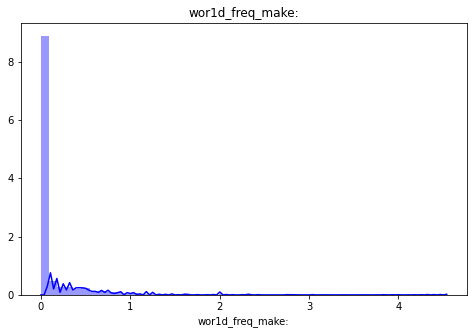

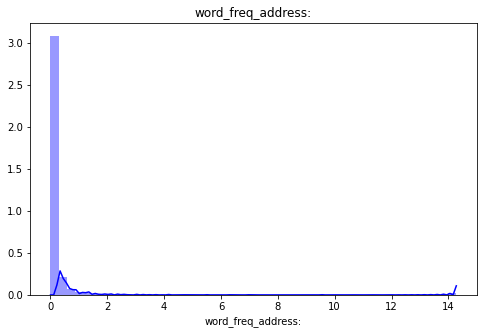

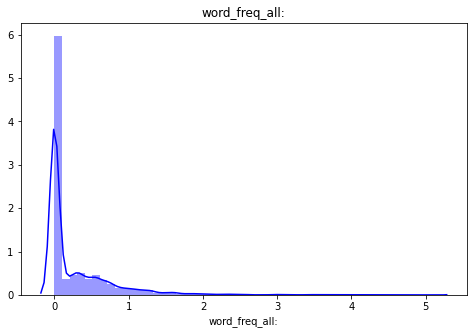

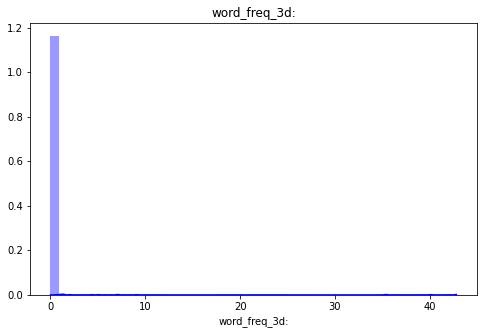

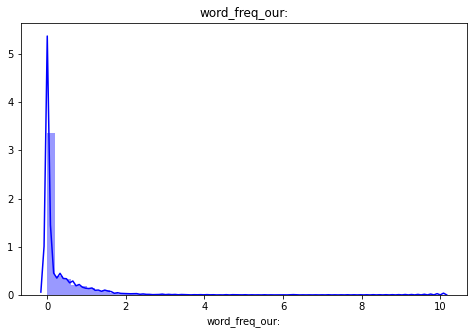

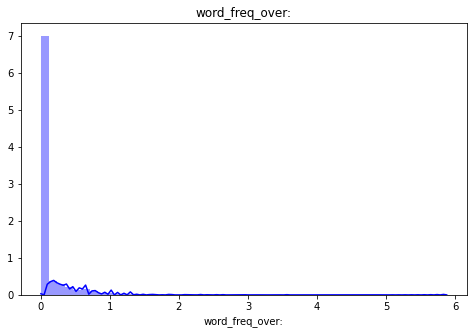

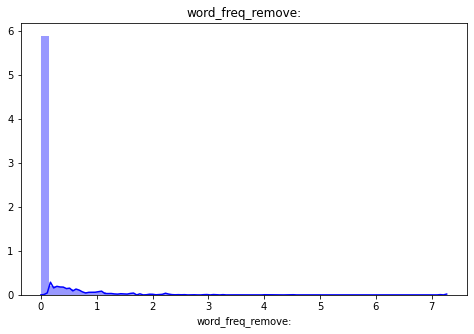

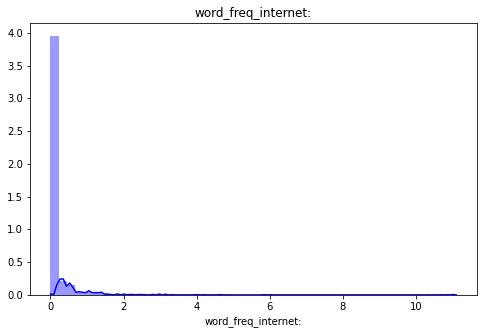

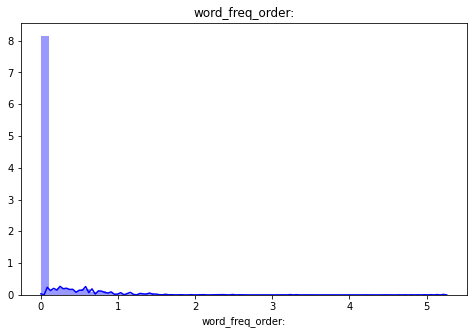

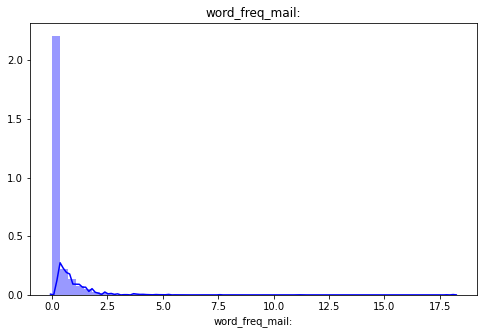

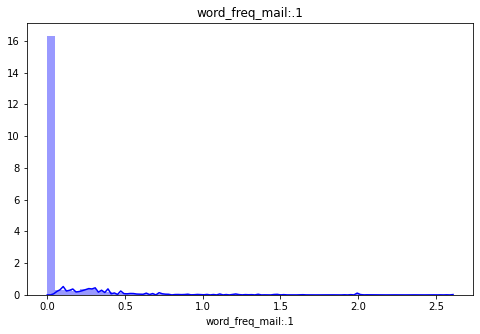

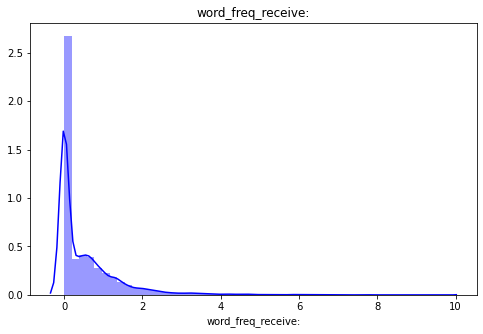

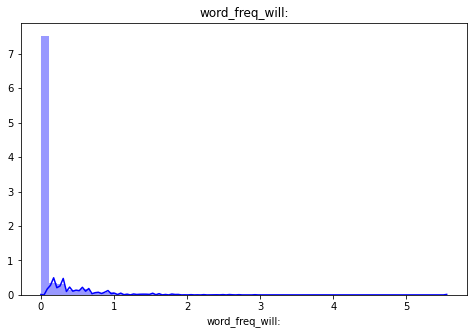

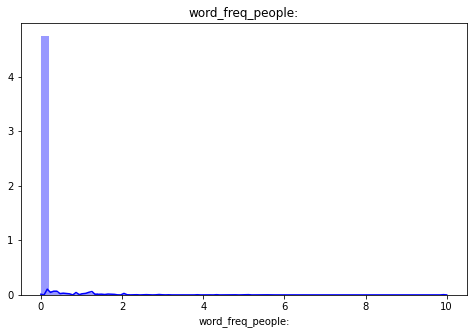

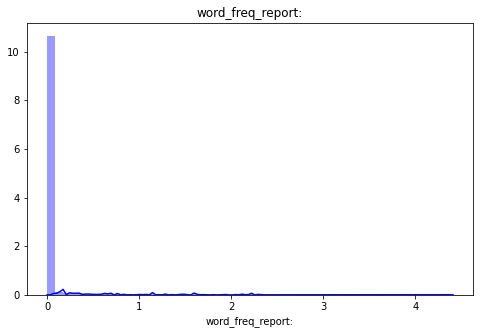

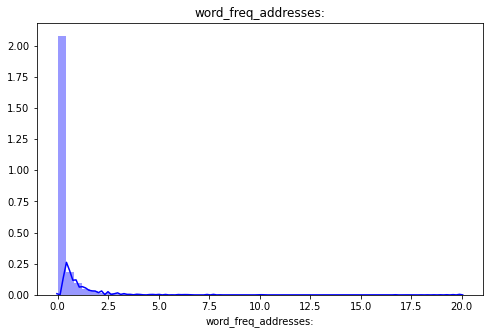

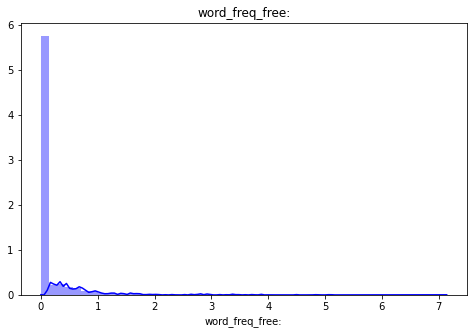

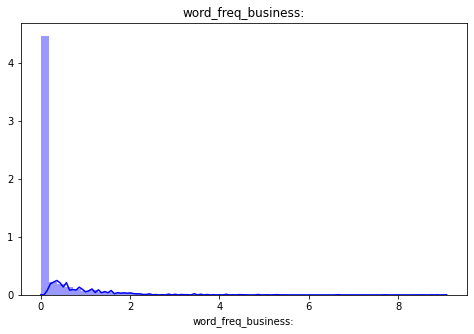

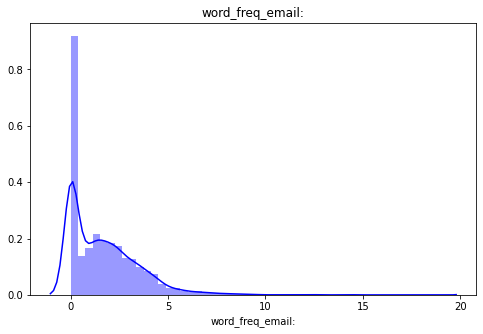

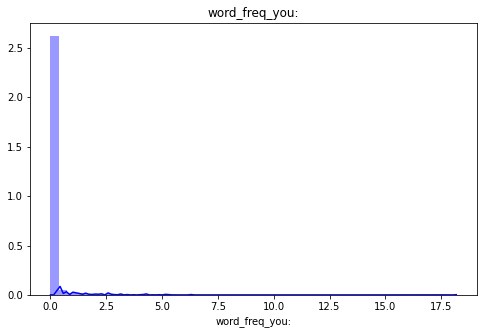

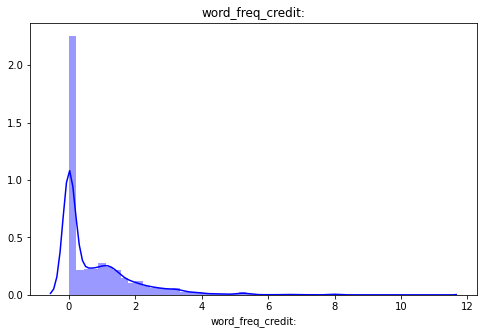

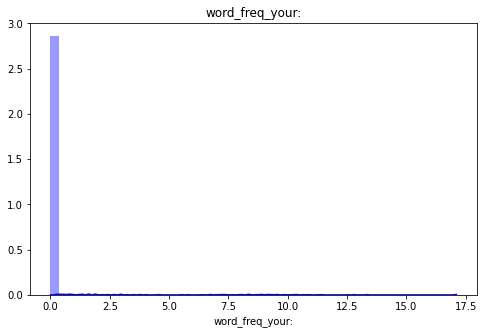

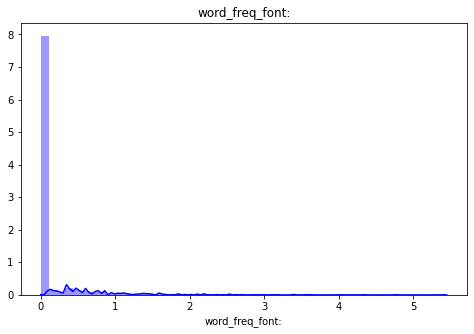

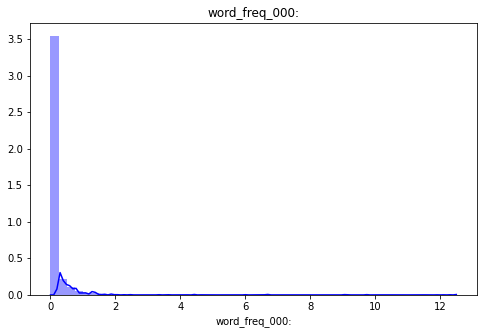

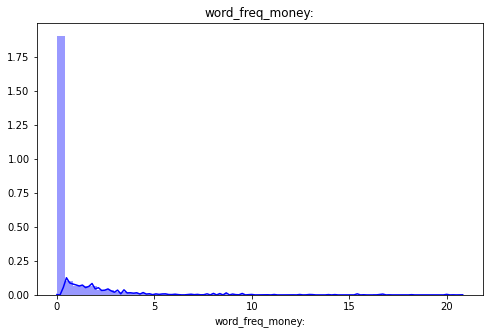

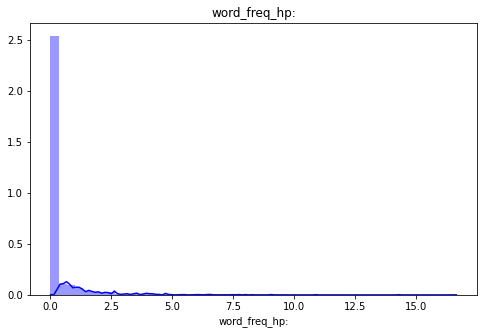

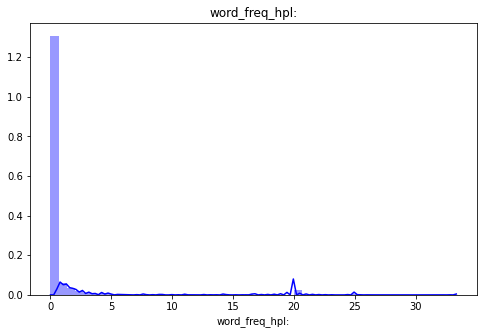

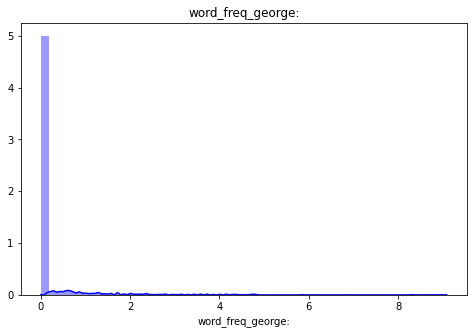

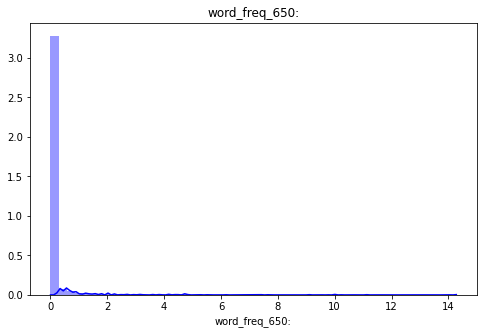

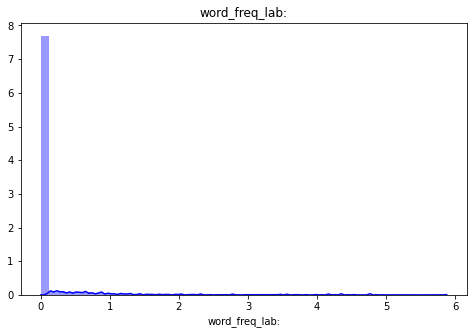

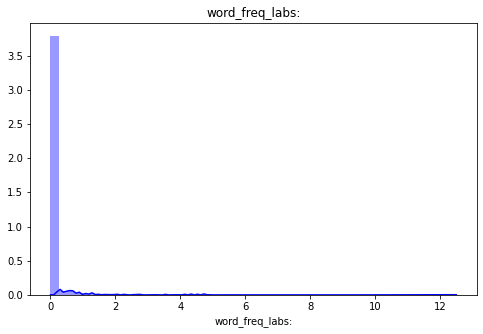

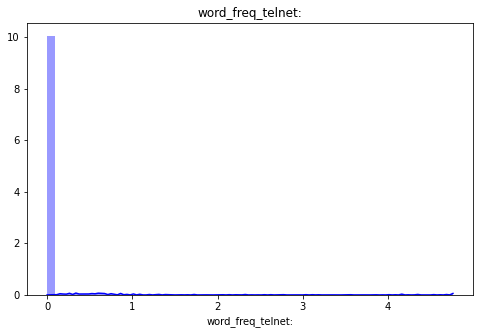

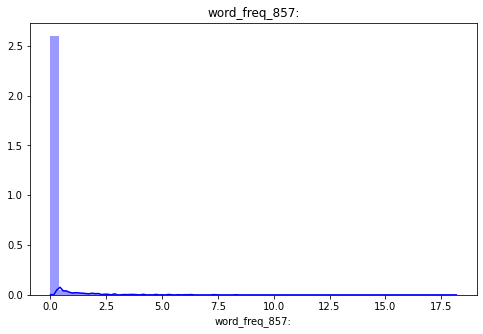

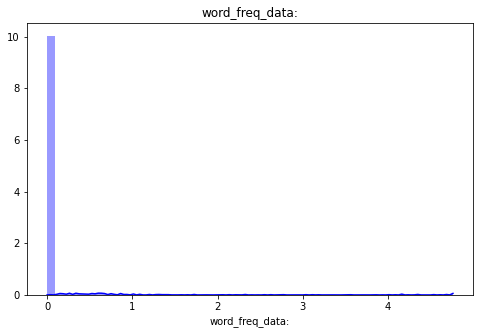

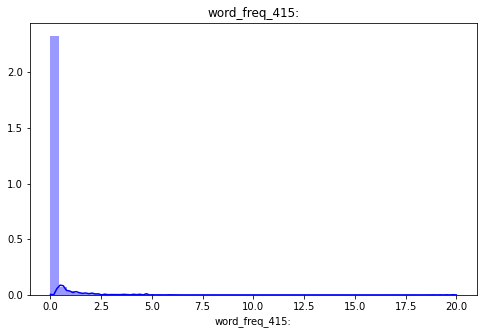

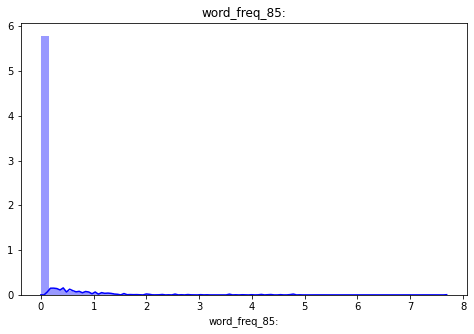

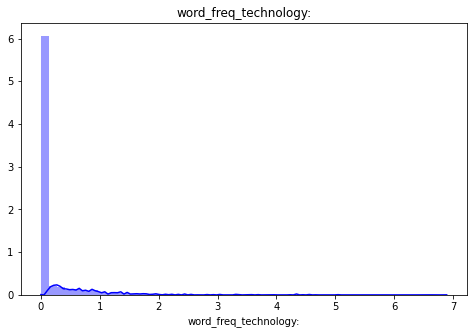

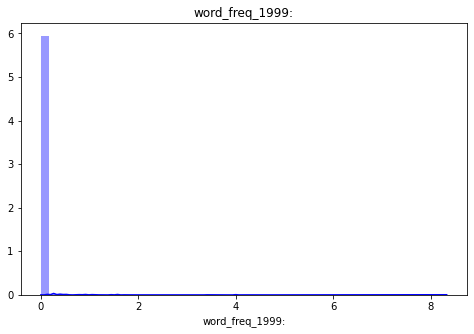

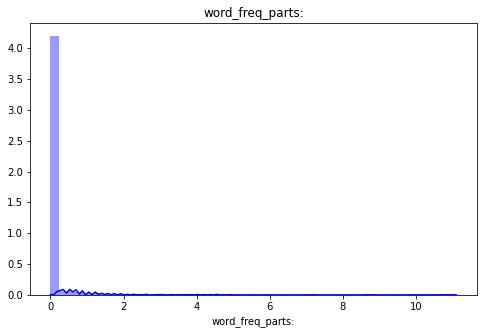

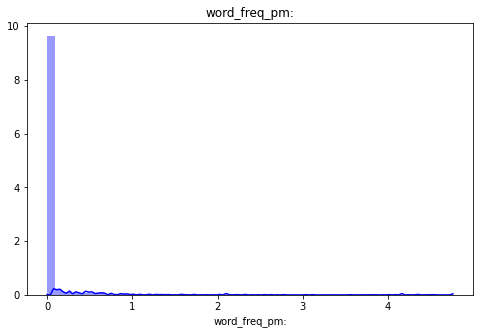

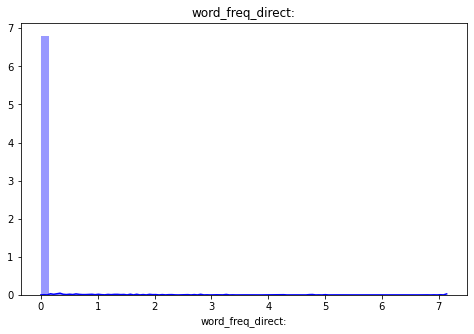

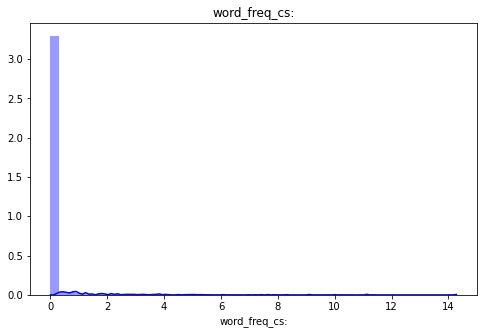

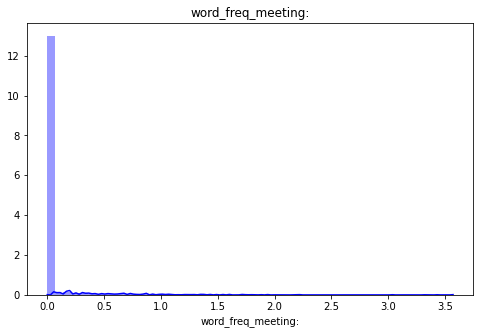

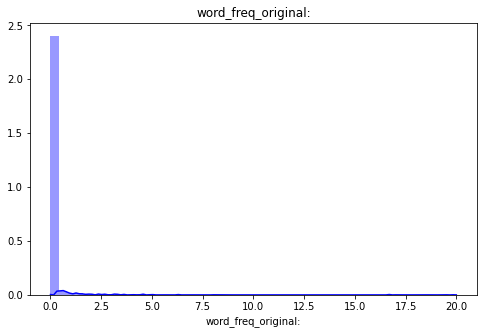

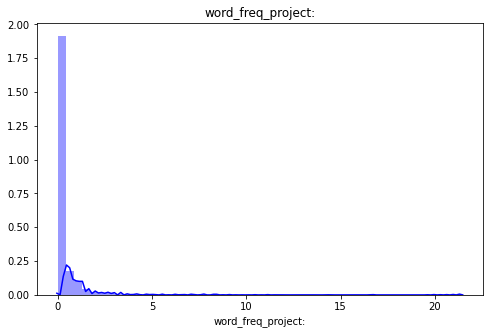

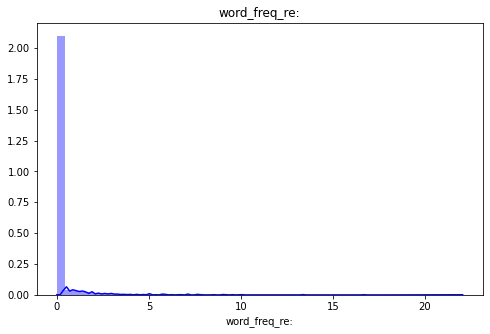

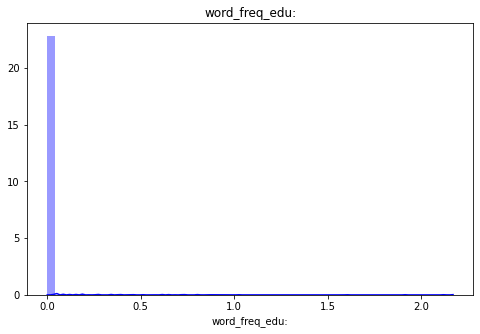

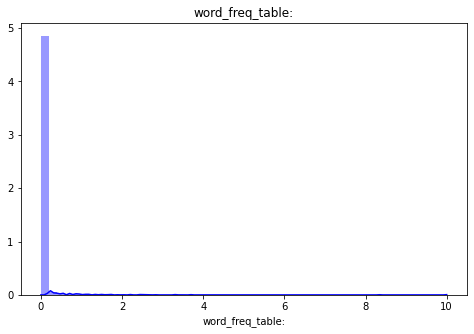

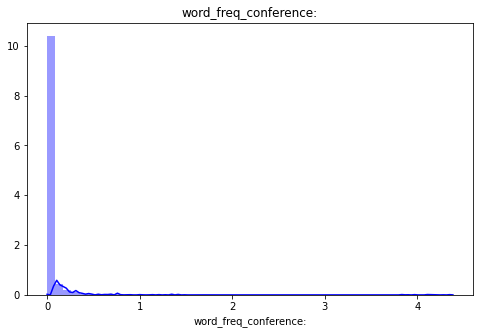

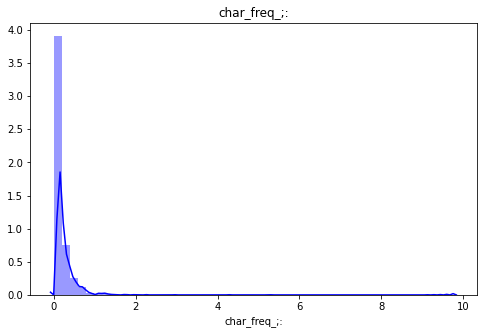

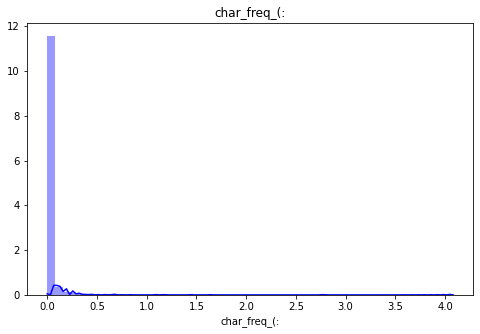

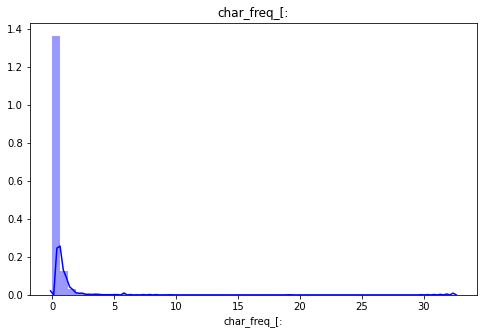

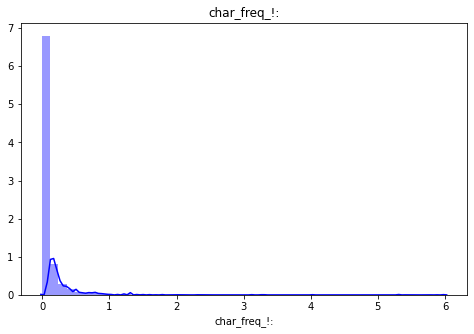

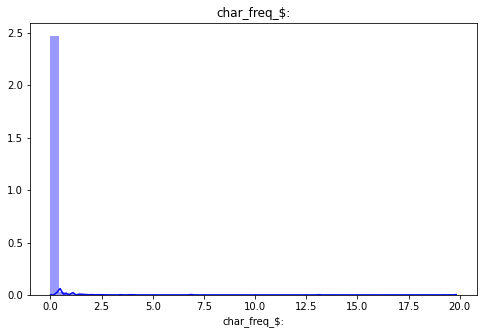

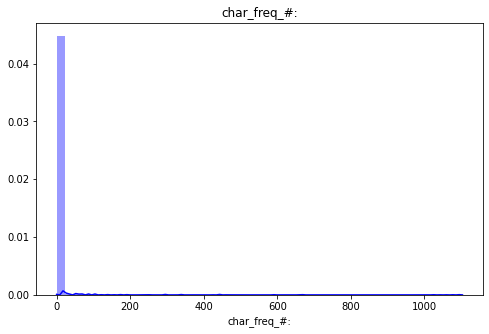

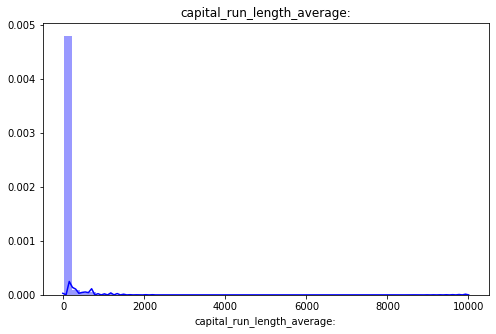

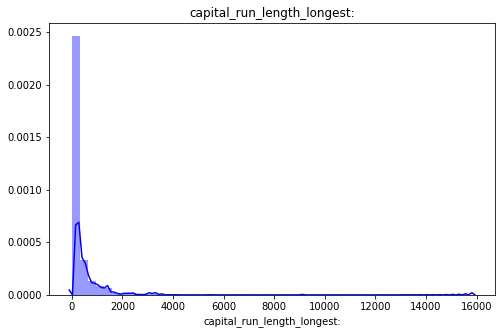

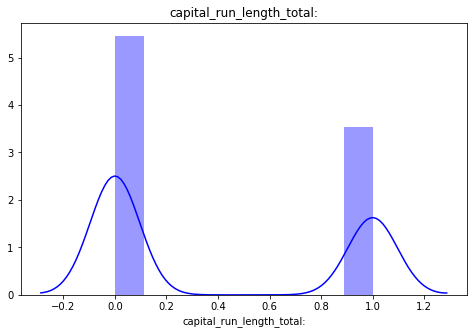

In [5]:
# Ploting the bivariate summaries and recording our observations
# Plot histogram

for a, b in enumerate(spam):
  plt.figure(figsize=(8, 5))
  plt.title(b)
  sns.distplot(spam[b], color='blue', norm_hist=True)

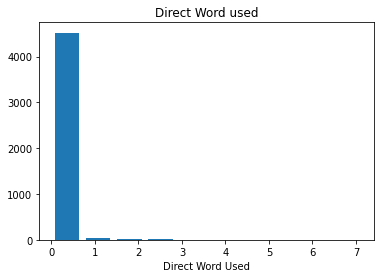

In [6]:
#Plot of columns
plt.hist(spam['word_freq_direct:'], bins = 10, histtype='bar',rwidth=0.8)
plt.xlabel('Direct Word Used')
plt.ylabel('')
plt.title('Direct Word used')
plt.show()

In [7]:
#Correlation matris for the variables

corr =spam.corr()
corr

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
wor1d_freq_make:,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address:,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all:,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d:,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our:,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over:,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.17306

In [ ]:
#Plot correlation matrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, annot=True,  linewidths=.5, ax=ax)


Numerical variables are not highly correlated

In [16]:
# Data Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

print(pca_df.head())

           PC1         PC2        PC3  ...       PC8       PC9      PC10
0    -3.786900    9.411757  -2.246594  ...  0.392106 -0.196652 -0.059104
1   742.632101  -74.001353  -0.567936  ...  0.327922 -0.237582 -0.127896
2  2019.854074  102.077111 -23.776775  ... -0.207131  0.212517 -0.453114
3   -93.048341    3.008569  -1.043599  ... -0.115141  0.655997  0.091410
4   -93.048341    3.008568  -1.043596  ... -0.115118  0.655957  0.091474

[5 rows x 10 columns]


## 7. Implementing the Solution

In [22]:

#import Gaussian NB and Metrics for accuracy.
from sklearn import metrics 
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [12]:
spam.columns

Index(['wor1d_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_mail:.1', 'word_freq_receive:',
       'word_freq_will:', 'word_freq_people:', 'word_freq_report:',
       'word_freq_addresses:', 'word_freq_free:', 'word_freq_business:',
       'word_freq_email:', 'word_freq_you:', 'word_freq_credit:',
       'word_freq_your:', 'word_freq_font:', 'word_freq_000:',
       'word_freq_money:', 'word_freq_hp:', 'word_freq_hpl:',
       'word_freq_george:', 'word_freq_650:', 'word_freq_lab:',
       'word_freq_labs:', 'word_freq_telnet:', 'word_freq_857:',
       'word_freq_data:', 'word_freq_415:', 'word_freq_85:',
       'word_freq_technology:', 'word_freq_1999:', 'word_freq_parts:',
       'word_freq_pm:', 'word_freq_direct:', 'word_freq_cs:',
       'word_freq_meeting:', 'word_freq_original:', 'word_freq_project:',
   

**[Split 70: 30]**

In [15]:
#Splitting the data
cols = ['wor1d_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_mail:.1', 'word_freq_receive:',
       'word_freq_will:', 'word_freq_people:', 'word_freq_report:',
       'word_freq_addresses:', 'word_freq_free:', 'word_freq_business:',
       'word_freq_email:', 'word_freq_you:', 'word_freq_credit:',
       'word_freq_your:', 'word_freq_font:', 'word_freq_000:',
       'word_freq_money:', 'word_freq_hp:', 'word_freq_hpl:',
       'word_freq_george:', 'word_freq_650:', 'word_freq_lab:',
       'word_freq_labs:', 'word_freq_telnet:', 'word_freq_857:',
       'word_freq_data:', 'word_freq_415:', 'word_freq_85:',
       'word_freq_technology:', 'word_freq_1999:', 'word_freq_parts:',
       'word_freq_pm:', 'word_freq_direct:', 'word_freq_cs:',
       'word_freq_meeting:', 'word_freq_original:', 'word_freq_project:',
       'word_freq_re:', 'word_freq_edu:', 'word_freq_table:',
       'word_freq_conference:', 'char_freq_;:', 'char_freq_(:', 'char_freq_[:',
       'char_freq_!:', 'char_freq_$:', 'char_freq_#:',
       'capital_run_length_average:','capital_run_length_longest:']
X = spam[cols].values
y = spam['capital_run_length_total:'].values

#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)

In [17]:
X.shape, y.shape

((4601, 57), (4601,))

In [26]:
# Train the model
#
model = MultinomialNB()
model = model.fit(X_train, y_train)

# Predictions
#
predicted = model.predict(X_test)
predicted

compare= pd.DataFrame({'Actual': y_test, 'Predicted': predicted})

compare.describe()

,Actual,Predicted
count,921.000000,921.000000
mean,0.373507,0.387622
std,0.483998,0.487472
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [28]:
#accuracy and Confusion matrix

#Accuracy - The measure of how often a model makes the correct prediction

#Confusion matrix - 

print("The Accuracy score is:",metrics.accuracy_score( y_test, predicted ))

The Accuracy score is: 0.7904451682953312


**Split 70-30**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=25)

In [33]:
# Train the model
#
model = MultinomialNB()
model = model.fit(X_train, y_train)

# Predictions
#
predicted = model.predict(X_test)
predicted

compare= pd.DataFrame({'Actual': y_test, 'Predicted': predicted})

compare.describe()

#Accuracy
print("The Accuracy score is:",metrics.accuracy_score( y_test, predicted ))

The Accuracy score is: 0.7863866763215062


**Split 60:40**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=25)

# Train the model
#
model = MultinomialNB()
model = model.fit(X_train, y_train)

# Predictions
#
predicted = model.predict(X_test)
predicted

compare= pd.DataFrame({'Actual': y_test, 'Predicted': predicted})

compare.describe()

#Accuracy
print("The Accuracy score is:",metrics.accuracy_score( y_test, predicted ))

The Accuracy score is: 0.7881586094513852


**Classification Report and Confusion Matrix**

**Conclusion**

A split of 80: 20 gives the best results with an accuracy score of 79%

## 8. Challenging the solution

I opted for Multinomial due to the ease of implementation. 

Data scientists are advised to try out different models and find out which gives the best results. 





## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

We did have the right data

### b). Do we need other data to answer our question?

No

### c). Did we have the right question?

Teh right questions were asked and answered.